## Algorithm training, testing, validation, and experiment tracking

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # Revert to matplotlib defaults
plt.rcParams['figure.figsize'] = (16, 12)

### Model training and testing

In [2]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# load clean dataset
data_load_path = '../data/clean/'

# training data
train_df = pd.read_csv(data_load_path + 'train.csv')
X_train = train_df.drop(['Daily_radiation'], axis = 1)
y_train = train_df['Daily_radiation']

# test data
test_df = pd.read_csv(data_load_path + 'test.csv')
X_test = test_df.drop(['Daily_radiation'], axis = 1)
y_test = test_df['Daily_radiation']

### Linear Regression

In [4]:
# Setup the pipeline steps for linear regression
steps = [
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
]

# Create the pipeline
pipeline_lr = Pipeline(steps)

# Fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [5]:
# Evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_lr))
print('Mean Squared Error: %.2f' % (mse))

r2_score:  0.9397860807754174
Mean Squared Error: 31.13


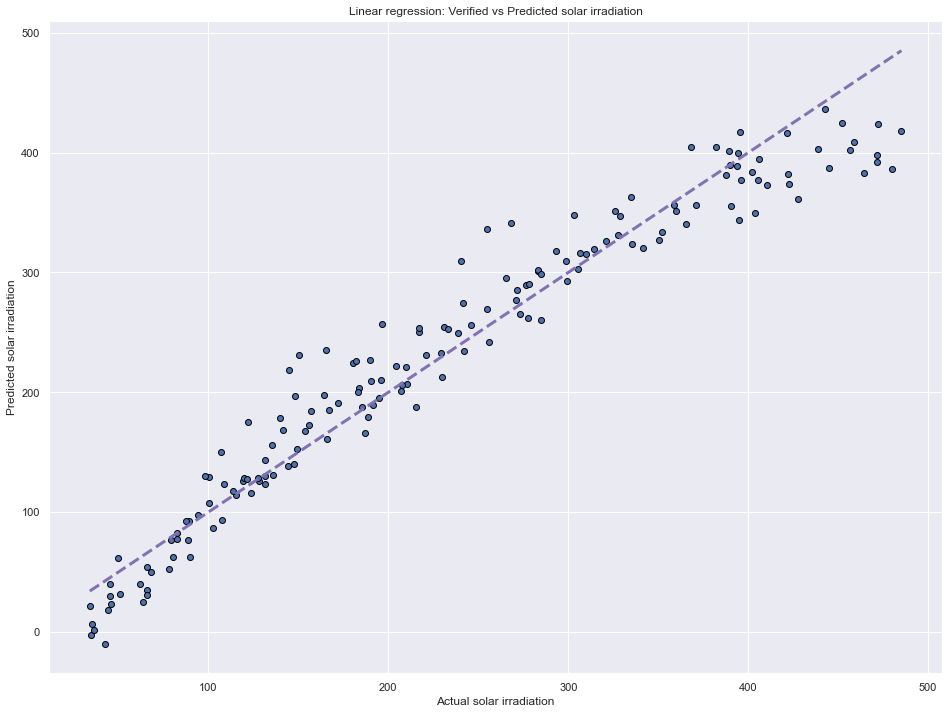

In [7]:
#Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title('Linear regression: Verified vs Predicted solar irradiation')
plt.savefig('notebooks_figures/lr_line_of_fit.jpg')
plt.show()

c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


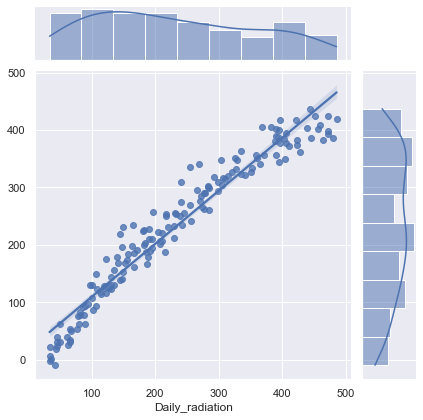

In [8]:
sns.jointplot(y_test, y_pred_lr, kind = 'reg')
plt.savefig('notebooks_figures/lr_jointplot.jpg')
plt.show()

### Random Forest Regressor

In [9]:
# Setup the random forest model: rft
rfr = RandomForestRegressor()

# Fit the pipeline to the train set
rfr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_rfr = rfr.predict(X_test)

In [10]:
# Evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_rfr))
print('Mean Squared Error: %.2f' % (mse_rf))

r2_score:  0.9671253092358127
Mean Squared Error: 23.00


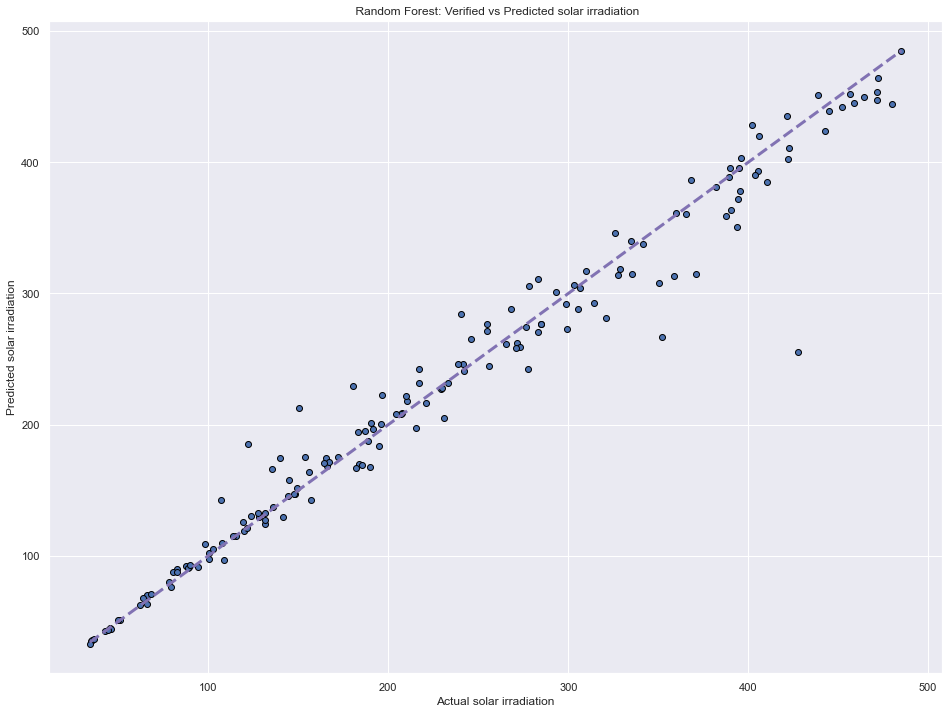

In [11]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(' Random Forest: Verified vs Predicted solar irradiation')
plt.savefig('notebooks_figures/rfr_line_of_fit.jpg')
plt.show()

c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


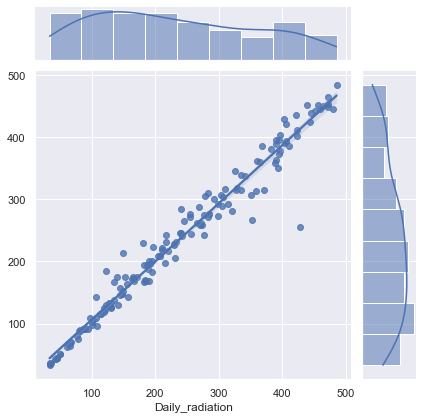

In [12]:
sns.jointplot(y_test, y_pred_rfr, kind = 'reg')
plt.savefig('notebooks_figures/rfr_jointplot.jpg')
plt.show()

### GradientBoosting Regressor

In [13]:
# Setup the gradient boosting model: gbr
gbr = GradientBoostingRegressor()

# Fit the pipeline to the train set
gbr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred_gbr = gbr.predict(X_test)

In [14]:
# Evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared = False)
print('r2_score: ', r2_score(y_test, y_pred_gbr))
print('Mean Squared Error: %.2f' % (mse_gr))

r2_score:  0.9689424164718484
Mean Squared Error: 22.36


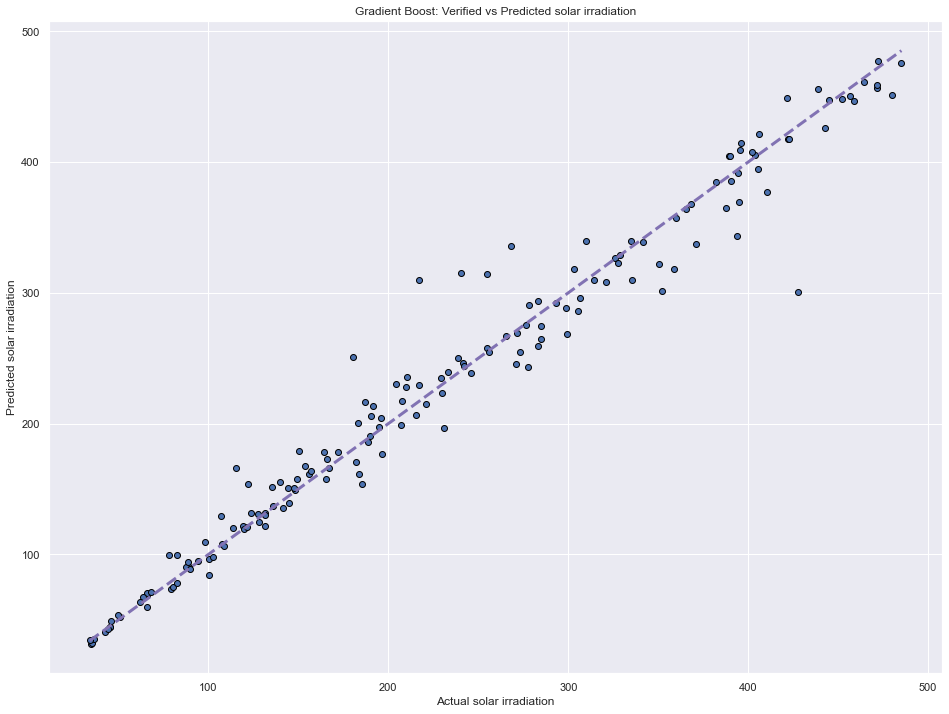

In [15]:
# Run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors = (0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw = 3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title('Gradient Boost: Verified vs Predicted solar irradiation')
plt.savefig('notebooks_figures/gbr_line_of_fit.jpg')
plt.show()

c:\users\rag\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


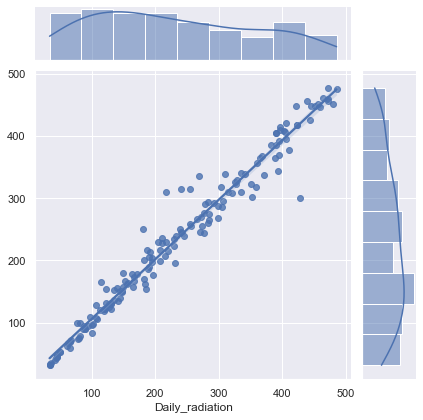

In [16]:
sns.jointplot(y_test, y_pred_gbr, kind = 'reg')
plt.savefig('notebooks_figures/gbr_jointplot.jpg')
plt.show()

### Model Validation

In [17]:
# validation data
val_df = pd.read_csv(data_load_path + 'val.csv')
X_val = val_df.drop(['Daily_radiation'], axis=1)
y_val = val_df['Daily_radiation']

In [18]:
# validate models
y_val_lr = pipeline_lr.predict(X_val)
y_val_rfr = rfr.predict(X_val)
y_val_gbr = gbr.predict(X_val)

In [19]:
# Evaluating algorithm performance for linear regression
mse_lr_val = mean_squared_error(y_val, y_val_lr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_lr))
print('Linear Regression - Mean Squared Error: %.2f' % (mse_lr_val))

r2_score:  0.936519244622433
Linear Regression - Mean Squared Error: 31.14


In [20]:
# Evaluating algorithm performance for random forest regression
mse_rf_val = mean_squared_error(y_val, y_val_rfr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_rfr))
print('Random Forest - Mean Squared Error: %.2f' % (mse_rf_val))

r2_score:  0.9838931205633474
Random Forest - Mean Squared Error: 15.68


In [21]:
# Evaluating algorithm performance for gradient boost regression
mse_gbr_val = mean_squared_error(y_val, y_val_gbr, squared = False)
print('r2_score: ', r2_score(y_val, y_val_gbr))
print('Gradient Boost - Mean Squared Error: %.2f' % (mse_gbr_val))

r2_score:  0.9772353331093704
Gradient Boost - Mean Squared Error: 18.65


In [ ]:
## Export model and hook it with api

In [ ]:
a = 

## Experiment tracking with neptune

In [ ]:
# import neptune libraries and sklearn integration
import neptune.new as neptune
import neptune.new.integrations.sklearn as npt_utils

In [ ]:
nept_project="maximilien-vicari/solarcast"
nept_api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiI5NTNmZjYyZS00NjFjLTQyYWQtOTFiNy02ZmVjZWEzOGFmNWQifQ=="

run = neptune.init(api_token=nept_api_token,
                   project=nept_project,
                   name='solar-irradiation',
                   source_files=["model_dev_sr.ipynb"])

In [ ]:
# Track files, models, and folders
# File
path_to_raw_data = '../data/raw/'
run["raw_datasets"].track_files(path_to_raw_data)

path_to_clean_data = '../data/clean/'
run["cleaned_datasets"].track_files(path_to_clean_data)

# Folder
path_to_notebooks = '../notebooks/'
run["notebooks"].track_files(path_to_notebooks)

In [ ]:
# train, and test; while tracking the experiment
run['lr_summary'] = npt_utils.create_regressor_summary(pipeline_lr, X_train, X_test, y_train, y_test)
run['gbr_summary'] = npt_utils.create_regressor_summary(gbr, X_train, X_test, y_train, y_test)
run['rfr_summary'] = npt_utils.create_regressor_summary(rfr, X_train, X_test, y_train, y_test)

In [ ]:
a =

In [ ]:
# stop experiment
run.stop()

## Experiment tracking with mlflow

In [ ]:
# import libraries
import mlflow
import mlflow.sklearn

In [ ]:
# model metrics for linear regression
rmse_lr_pred = np.sqrt(mean_squared_error(y_test, y_pred_lr, squared = False))
rmae_lr_pred = np.sqrt(mean_absolute_error(y_test, y_pred_lr))
R2_score_lr = r2_score(y_test, y_pred_lr)

# model metrics for random forest
rmse_rfr_pred = np.sqrt(mean_squared_error(y_test, y_pred_rfr, squared = False))
rmae_rfr_pred = np.sqrt(mean_absolute_error(y_test, y_pred_rfr))
R2_score_rfr = r2_score(y_test, y_pred_rfr)

# model metrics for gradient boost
rmse_gbr_pred = np.sqrt(mean_squared_error(y_test, y_pred_gbr, squared = False))
rmae_gbr_pred = np.sqrt(mean_absolute_error(y_test, y_pred_gbr))
R2_score_gbr = r2_score(y_test, y_pred_gbr)

#### manually log experiment

In [ ]:
# set the tracking uri
mlflow.set_tracking_uri("http://127.0.0.1:5000/")
experiment = mlflow.get_experiment('0')

In [ ]:
print("Name of experiment: {}".format(experiment.name))
print("Location of Artifact: {}".format(experiment.artifact_location))
print("Life cycle phase: {}".format(experiment.lifecycle_stage))
print("Experiment_ID: {}".format(experiment.experiment_id))

In [ ]:
# start experiment tracking
run = mlflow.start_run(run_name = 'solar_irradiation')
run_id = run.info.run_id

In [ ]:
# Log mlflow attributes for mlflow UI
# log metrics for linear regression
mlflow.log_metric("rmse_lr", rmse_lr_pred)
mlflow.log_metric("rmae_lr", rmae_lr_pred)
mlflow.log_metric("r2_score_lr", R2_score_lr)

# log metrics for random forest
mlflow.log_metric("rmse_rfr", rmse_rfr_pred)
mlflow.log_metric("rmae_rfr", rmae_rfr_pred)
mlflow.log_metric("r2_score_rfr", R2_score_rfr)

# log metrics for gradientboost
mlflow.log_metric("rmse_gbr", rmse_gbr_pred)
mlflow.log_metric("rmae_gbr", rmae_gbr_pred)
mlflow.log_metric("r2_score_gbr", R2_score_gbr)

In [ ]:
# log models experiments
artifact_path = "default"
mlflow.sklearn.log_model(pipeline_lr, artifact_path = artifact_path, registered_model_name = "linear-regression-model")
mlflow.sklearn.log_model(pipeline_rfr, artifact_path = artifact_path, registered_model_name = "sklearn-random-forest-model")
mlflow.sklearn.log_model(pipeline_gbr, artifact_path = artifact_path, registered_model_name = "sklearn-gradientboost-model")

In [ ]:
# Log artifacts (output files)
mlflow.log_artifact("lr_line_of_fit.jpg", artifact_path = 'features')

# Log Features
mlflow.log_artifact('train.csv', artifact_path = 'features')

In [ ]:
# End tracking
mlflow.end_run()

#### Auto log experiment

In [ ]:
# enable auto logging
mlflow.sklearn.autolog(log_models = True)

In [ ]:
with mlflow.start_run(experiment_id = experiment.experiment_id, run_name = 'auto_lr_model') as run:
    pipeline_lr.fit(X_train,
                      y_train)
    y_pred_lr = pipeline_lr.predict(X_test)
    pipeline_rfr.fit(X_train,
                      y_train)
    y_pred_rfr = pipeline_rfr.predict(X_test)
    pipeline_gbr.fit(X_train,
                      y_train)
    y_pred_gbr = pipeline_gbr.predict(X_test)

In [ ]:
# End tracking
mlflow.end_run()

### Export models

In [ ]:
# check sklearn version
from sklearn import __version__

print(__version__)

In [ ]:
# loading libraries
import joblib

# Save Models to file in the model directory
# save linear regression model
joblib_lr = "../ml_models/model_lr.pkl"  
joblib.dump(pipeline_lr, joblib_lr)
# save random forest model
joblib_rfr = "../ml_models/model_rfr.pkl" 
joblib.dump(rfr, joblib_rfr)
# save gradientboost model
joblib_gbr = "../ml_models/model_gbr.pkl"  
joblib.dump(gbr, joblib_gbr)